(sec_PythonIntegracion)=
# Integración en **Python**

En esta sección aprenderemos a integrar con `SymPy` y a aproximar integrales definidas usando `NumPy` y `SciPy`.

## Integración con **SymPy**
Para calcular exactamente la integral de una función mediante SymPy, se emplea la función *integrate*. 
Por ejemplo, para calcular una primitiva de $\sin(x)$, escribiremos 

In [1]:
import sympy as sp

x = sp.symbols('x')
f = sp.sin(x)
I = sp.integrate(f,x)

print('Una primitiva de ',f, ' es = ',I)

Una primitiva de  sin(x)  es =  -cos(x)


Para calcular la integral definida $\displaystyle\int_0^\pi\sin(x)\,dx$, escribiremos

In [2]:
import sympy as sp

x = sp.symbols('x')
f = sp.sin(x)
Idef = sp.integrate(f,(x,0,sp.pi))

print('La integral de ',f, ' entre 0 y pi es = ',Idef)

La integral de  sin(x)  entre 0 y pi es =  2


`SymPy` no siempre es capaz de calcular una primitiva. En caso de no poder hacerlo, devuelve como salida la integral de partida:

In [10]:
I = sp.integrate(sp.sin(x*sp.cos(x)),x)
print(I)

Integral(sin(x*cos(x)), x)


Es posible calcular algunas integrales impropias, cuando los límites de integración son $-\infty$ y/o $+\infty$, es decir, integrales de la forma:

$$
\int_{-\infty}^bf(x)\,dx\,,\quad
\int_{a}^{+\infty}f(x)\,dx\,,\quad
\int_{-\infty}^{+\infty}f(x)\,dx\,.
$$

In [7]:
x = sp.symbols('x')
f = sp.exp(x)
I1 = sp.integrate(f,(x,-sp.oo,0))

print('Integral de ',f,' entre -oo y 0 es = ',I1)

g = 1/(x**2)
I2 = sp.integrate(g,(x,1,sp.oo))

print('Integral de ',g,' entre 1 y +oo es = ',I2)


Integral de  exp(x)  entre -oo y 0 es =  1
Integral de  x**(-2)  entre 1 y +oo es =  1


Si necesitamos calcular una integral impropia de segunda especie, como por ejemplo, 

$$
\int_{-1}^2\dfrac{1}{x}\,dx\,,
$$
y hacemos:

In [18]:
h = 1/x
I2e = sp.integrate(h,(x,-1,2))
print('La integral vale = ', I2e)

La integral vale =  nan


En este caso, para entender qué está ocurriendo, es mejor usar la definición: 

$$
\int_{-1}^2\dfrac{1}{x}\,dx =\int_{-1}^0\dfrac{1}{x}\,dx +\int_{0}^2\dfrac{1}{x}\,dx\,,  
$$
donde 

$$
\int_{-1}^0\dfrac{1}{x}\,dx =\lim_{b\rightarrow 0^-}\int_{-1}^b\dfrac{1}{x}\,dx\,,
$$
y

$$
\int_{0}^2\dfrac{1}{x}\,dx =\lim_{a\rightarrow 0^+}\int_{a}^2\dfrac{1}{x}\,dx\,.
$$

In [21]:
h = 1/x
a,b = sp.symbols('a:b', real=True)
L1 = sp.limit(sp.integrate(h,(x,-1,b)),b,0,'-')
L2 = sp.limit(sp.integrate(h,(x,a,2)),a,0,'+')
print('Valor del primer límite = ', L1)
print('Valor del segundo límite = ', L2)
print('La integral impropia es = ',L1+L2)

Valor del primer límite =  -oo
Valor del segundo límite =  oo
La integral impropia es =  nan


## Integración numérica con **NumPy**
Como hemos visto, no siempre es posible calcular exactamente la integral de una función mediante SymPy.
También puede ocurrir que la expresión de la primitiva sea demasiado costosa de evaluar o que solo conozcamos los valores de la función en un conjunto finito de puntos. En estos casos, se emplean técnicas de integración numérica.

Importamos a continuación los módulos necesarios.

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Hemos visto varias fórmulas de integración numérica para aproximar una integral de la forma 

$$
\int_a^bf(x)\,dx
$$
donde $a$ y $b$ son números reales. Concretamente, hemos visto las fórmulas del punto medio, del trapecio y de Simpson. 

La fórmula del punto medio aproxima la integral mediante

$$
\int_a^bf(x)\,dx\simeq (b-a)f(\dfrac{a+b}{2})\,.
$$

Aproximamos a continuación la integral 

$$
I=\int_0^{\pi}\sin(x)\,dx\,,
$$
mediante diferentes fórmulas de cuadratura.

In [2]:
x = sp.Symbol('x', real = True)

#Aproximación por punto medio
a = 0
b = np.pi
pm = (a+b)/2

f_exp = sp.sin(x)
f = sp.lambdify(x,f_exp)

fpm = f(pm)
I_aprox = (b-a) * fpm
print('Valor aproximado de I mediante la fórmula del punto medio = ', I_aprox)

Valor aproximado de I mediante la fórmula del punto medio =  3.141592653589793


Implementamos a continuación una función para la fórmula del trapecio simple: 

$$
\int_a^bf(x)\,dx\simeq \dfrac{b-a}{2}(f(a)+f(b))\,.
$$

In [4]:
def trapecio(a,b,fa,fb):
    aprox_tr = (b-a) * (fa + fb)/2
    return aprox_tr

La empleamos para aproximar $I$:

In [5]:
x = sp.Symbol('x', real = True)

a = 0
b = np.pi
pm = (a+b)/2

f_exp = sp.sin(x)
f = sp.lambdify(x,f_exp)

fa = f(a)
fb = f(b)
aproximacion_trapecio = trapecio(a,b,fa,fb)
print('Valor aproximado de la integral por trapecio simple = ', aproximacion_trapecio)

Valor aproximado de la integral por trapecio simple =  1.9236706937217898e-16


La fórmula del trapecio está implementada en ´NumPy´, en la función *trapz*. 

In [15]:
X = np.array([a,b])
Y = np.sin(X)
print('Valor aproximado de I mediante la fórmula del trapecio = ', np.trapz(Y,X))

Valor aproximado de I mediante la fórmula del trapecio =  1.9236706937217898e-16


Obtenemos valores muy diferentes con las distintas fórmulas... 

### Ejercicio 1
Implementa una función que permita aproximar la integral definida de una función dada $f$ en un intervalo $[a,b]$ mediante la fórmula de Simpson: 
$$
\int_a^bf(x)\,dx\simeq\dfrac{b-a}{6}(f(a)+4f(\dfrac{a+b}{2})+f(b))\,.
$$
Empléala para aproximar el valor de $I$.

In [26]:
def Simpson(a,b,fa,fpm,fb):
    aprox_S = (b-a) /6 * (fa + 4*fpm + fb)
    return aprox_S

In [27]:
a = 0
b = np.pi
pm = (a+b)/2
fa = np.sin(a)
fb = np.sin(b)
fpm = np.sin(pm)
aproximacion_Simpson = Simpson(a,b,fa,fpm,fb)
print('Valor aproximado de la integral por Simpson = ', aproximacion_Simpson)

Valor aproximado de la integral por trapecio simple =  2.0943951023931953


La fórmula de Simpson está implementada en ´SciPy´:

In [16]:
X = np.array([a,(a+b)/2,b]) 
Y = np.sin(X)
print('Valor aproximado de I mediante la fórmula de Simpson = ', integrate.simpson(Y, X))

Valor aproximado de I mediante la fórmula de Simpson =  2.0943951023931953


Para obtener una aproximación mejor, se suelen usar fórmulas compuestas. Dividimos el intervalo de partida, $[a,b]$ en $N$ subintervalos de igual liongitud, $h=(b-a)/N$. Entonces, podemos escribir
$$
\int_a^bf(x)\,dx = \sum_{i=1}^N\int_{x_{i-1}}^{x_i}f(x)\,dx\,,
$$
donde $x_i=a+ih$, para $i=0,\ldots,N$.

Cada una de las integrales entre $x_{i-1}$ y $x_i$ se puede aproximar por una fórmula simple. Por ejemplo, si aproximamos la integral, para cada $i=1,\ldots,N$, mediante punto medio simple:
$$
\int_{x_{i-1}}^{x_i}f(x)\,dx\simeq h\,f(\dfrac{x_{i-1}+x_i}{2})\,,
$$
obtenemos la fórmula del punto medio compuesta.

Implementamos a continuación esta fórmula y la empleamos para aproximar el valor de $I$ con $100$ subintervalos.

In [28]:
def pmc(a, b, f, n):
    h = float((b-a)/n)
    valor = 0
    for i in range(n):
        valor += f((a + h/2.0) + i*h)
    valor *= h
    return valor    

In [29]:
a = 0
b = np.pi
f = np.sin
n = 100
aprox_pmc = pmc(a,b,f,n)
print('Valor aproximado por punto medio compuesto = ',aprox_pmc)

Valor aproximado por punto medio compuesto =  2.0000822490709864


### Ejercicio 2
Para obtener el volumen de un cono circular recto de altura $h$ y radio de la base $R$, se puede hacer girar la recta que pasa por el origen y el punto $(h,R)$ alrededor del eje $OX$ entre $x=0$ y $x=h$.

In [31]:
x,y = sp.symbols('x:y', real=True)
R = sp.Symbol('R', real=True)
h = sp.Symbol('h', real=True)

y = R / h * x # Ecuación de la recta que pasa por (0,0) y (h,R)
# Volumen de revolución
volumen = sp.pi * sp.integrate(y*y,(x,0,h))
print('El volumen del cono es = ',volumen)

El volumen del cono es =  pi*R**2*h/3


Representamos a continuación un cono circular recto de altura $h=6$ y radio de la base $R=3$: 

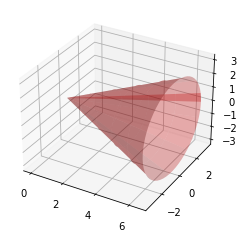

In [36]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

RR = 3.0 
hh = 6.0 
u = np.linspace(0, 6.5, 60)
v = np.linspace(0, 6.5, 60)
U, V = np.meshgrid(u, v)

X = U
Y1 = RR/hh*U*np.cos(V)
Z1 = RR/hh*U*np.sin(V)

ax.plot_surface(X, Y1, Z1, alpha=0.3, color='red', rstride=6, cstride=12)
plt.show()